# Error de truncación en el cálculo numérico

La siguientes dos celdas importan un par de módulos de `python` que nos seran útiles. `math` contiene funciones y constantes matemáticas (ver `help(math)`) y `matplotlib` es una librería para hacer gráficos (ver [matplotlib](http://matplotlib.org), sobre todo la sección [galería](http://matplotlib.org/gallery.html)).

La sequencia

    import matplotlib.pyplot as plt
    
es bastante estándard en `python`. Lo que hace es importar el sub-módulo `pyplot` que pertenece a `matplotlib` y asignarle el alias `plt`. De este modo, cuando queramos accesar cualquier función que le pertenece al sub-modulo `pyplot`, deberemos hacerlo anteponiendo `plt` (por ejemplo: `plt.plot(...)`).

La celda siguiente también importa `matplotlib` y le asigna un alias. Estos comandos son sólo útiles para efectos de la clase, para que los gráficos tengan labels legibles desde lejos.

In [7]:
%matplotlib inline 
import math
import matplotlib.pyplot as plt

In [8]:
import matplotlib as mp
mp.rcParams['xtick.labelsize'] = 13
mp.rcParams['ytick.labelsize'] = 13

# Error de truncación

Vamos a ver un ejemplo en el cálculo del número `e` como serie infinta truncada.

### La forma básica de python

In [9]:
e = 1.
k_factorial = 1.
N_max = 10
e_vs_n = [e]

for i in range(1, N_max):
    k_factorial *= i
    e += 1. / k_factorial
    e_vs_n.append(e)

In [10]:
for i in range(N_max):
    print i, e_vs_n[i]

0 1.0
1 2.0
2 2.5
3 2.66666666667
4 2.70833333333
5 2.71666666667
6 2.71805555556
7 2.71825396825
8 2.71827876984
9 2.71828152557


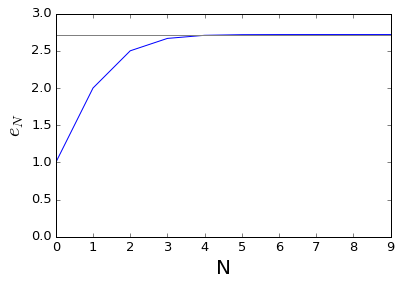

In [11]:
plt.plot(range(N_max), e_vs_n)
plt.axhline(math.e, color='0.5')
plt.ylim(0, 3)
plt.xlabel('N', fontsize=20)
plt.ylabel('$e_N$', fontsize=20) # lo que aparece entre signos $ es sintáxis de 'Latex'

## Mejorando el plot

El plot anterior esta OK, pero lo que de verdad queremos ver es la diferencia entre $e_N$ y el verdadero `e` (que en realidad no es exacto pero estamos asumiendo que `math.e` es mucho mejor que nuestro propio cálculo). 

Un gráfico que muestra de mejor manera aquello en que estamos interesados (la diferencia entre $e_N$ y `math.e` requiere calcular `e_vs_n` - `math.e`. Pero debido a los `types` distintos, esta operación no resulta directamente en `python`.

In [12]:
e_vs_n - math.e

TypeError: unsupported operand type(s) for -: 'list' and 'float'

Es necesario hacer una iteración y crear una nueva lista `diferencia_tmp` lo cual se logra con las siguientes 3 líneas:

In [13]:
diferencia_tmp = []
for e_i in e_vs_n:
    diferencia_tmp.append(e_i - math.e)
    
print(diferencia_tmp)

[-1.718281828459045, -0.7182818284590451, -0.2182818284590451, -0.05161516179237857, -0.009948495125712054, -0.0016151617923787498, -0.0002262729034896438, -2.7860205076724043e-05, -3.0586177750535626e-06, -3.0288585284310443e-07]


En la siguiente celda, la primera línea calcula una nueva lista `diferencia`, equivalente a la lista `diferencia_tmp` calculada previamente pero lo hace en sólo una línea. La sintáxis usada se llama `list comprehension`.

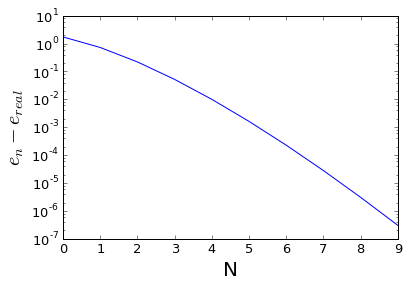

In [14]:
diferencia = [math.fabs(e_i - math.e) for e_i in e_vs_n]
plt.plot(range(N_max), diferencia)
plt.yscale('log')
plt.xlabel('N', fontsize=20)
plt.ylabel('$e_n - e_{real}$', fontsize=20)

Como podemos ver en el gráfico, la diferencia se acerca rápidamente a cero conforme crece N. Esta es una serie que converge rápido. Sin embargo, la convergencia no es la única limitación numérica de la cual preocuparse.

# Error de Redondeo

Calcularemos la derivada de sin(x) en x=1 radian.

### Ahora usaremos el módulo `numpy`.

In [15]:
import numpy as np

In [16]:
epsilon = np.logspace(-1, -15, 15, base=10.)
print epsilon

[  1.00000000e-01   1.00000000e-02   1.00000000e-03   1.00000000e-04
   1.00000000e-05   1.00000000e-06   1.00000000e-07   1.00000000e-08
   1.00000000e-09   1.00000000e-10   1.00000000e-11   1.00000000e-12
   1.00000000e-13   1.00000000e-14   1.00000000e-15]


Noten que epsilo es ahora un _arreglo de numpy_. Su tipo es distinto al tipo `lista` que usamos antes para `e_vs_n`:

In [17]:
print type(e_vs_n)
print type(epsilon)

<type 'list'>
<type 'numpy.ndarray'>


El tipo `np.ndarray` es mucho más fácil de usar porque ya esta `vectorizado`, es decir, las funciones básicas actúan como si fuese un vector.

Notar que al final de la línea siguiente, el resultado es directamente un vector, no tuvimos que iterar sobre los elementos de `epsilon` (la iteración se hace automáticamente y además es más rápida).

In [18]:
dsindx = (np.sin(1.0 + epsilon) - np.sin(1.0)) / epsilon
print dsindx

[ 0.49736375  0.53608598  0.53988148  0.54026023  0.5402981   0.54030189
  0.54030226  0.54030229  0.54030236  0.54030225  0.54030114  0.54034555
  0.53956839  0.53290705  0.55511151]


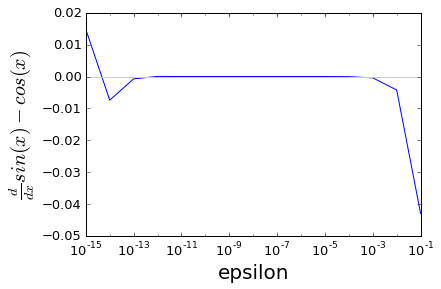

In [19]:
plt.plot(epsilon, dsindx - np.cos(1.))
plt.xscale('log')
plt.axhline(0, color='0.8')
plt.xlabel('epsilon', fontsize=20)
plt.ylabel('$\\frac{d}{dx}sin(x) - cos(x)$', fontsize=20)
_ = plt.xticks(epsilon[::2])

En el plot anterior notamos dos cosas.

- La diferencia decae cuando `epsilon` se achica.
- pero luego vuelve a crecer cuando `epsilon` se achica demasiado.

En realidad el comportamiento _plano_ que parece apreciarse en el plot anterior, es ficticio, un artefacto de nuestra escala de ploteo. Veamos el mismo plot en escala logarítmica:

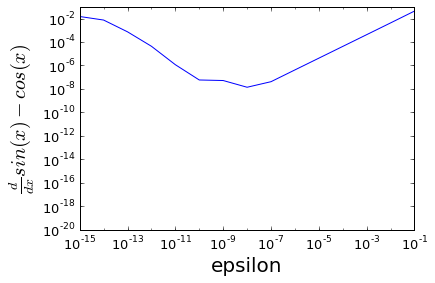

In [20]:
plt.plot(epsilon, np.fabs(dsindx - np.cos(1.)))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-20, 1e-1)
plt.axhline(0)
plt.xlabel('epsilon', fontsize=20)
plt.ylabel('$\\frac{d}{dx}sin(x) - cos(x)$', fontsize=20)
_ = plt.xticks(epsilon[::2])

## Machine epsilon (limite a nuestra precisión numérica)

La función que aparece en la siguiente celda muestra un resumen de los valores asociados a la precisión de nuestros cálculos. La siguiente celda muestra información extra que siempre puede obtenerse a través de la función `help`.

In [21]:
print(np.finfo(float))

Machine parameters for float64
---------------------------------------------------------------
precision= 15   resolution= 1.0000000000000001e-15
machep=   -52   eps=        2.2204460492503131e-16
negep =   -53   epsneg=     1.1102230246251565e-16
minexp= -1022   tiny=       2.2250738585072014e-308
maxexp=  1024   max=        1.7976931348623157e+308
nexp  =    11   min=        -max
---------------------------------------------------------------



In [22]:
help(np.finfo)

Help on class finfo in module numpy.core.getlimits:

class finfo(__builtin__.object)
 |  finfo(dtype)
 |  
 |  Machine limits for floating point types.
 |  
 |  Attributes
 |  ----------
 |  eps : float
 |      The smallest representable positive number such that
 |      ``1.0 + eps != 1.0``.  Type of `eps` is an appropriate floating
 |      point type.
 |  epsneg : floating point number of the appropriate type
 |      The smallest representable positive number such that
 |      ``1.0 - epsneg != 1.0``.
 |  iexp : int
 |      The number of bits in the exponent portion of the floating point
 |      representation.
 |  machar : MachAr
 |      The object which calculated these parameters and holds more
 |      detailed information.
 |  machep : int
 |      The exponent that yields `eps`.
 |  max : floating point number of the appropriate type
 |      The largest representable number.
 |  maxexp : int
 |      The smallest positive power of the base (2) that causes overflow.
 |  min : float

Revisen la ayuda y vean por qué las siguientes dos líneas tienen sentido:

In [23]:
print((1. + np.finfo(float).eps) == 1)
print((1. + np.finfo(float).eps/2.) == 1)

False
True


Noten que por defecto `numpy` usa `double floats`, o sea, racionales de doble precisión (en otros lenguages se llaman simplemente `doubles` y se le llama `floats` a los de precisión simple. En `python` los números de precisión simple también existen (`np.float32`). Dependiendo de la máquina, incluso a veces están disponibles los `np.float128`.

In [24]:
print(np.finfo(np.float32))

Machine parameters for float32
---------------------------------------------------------------
precision=  6   resolution= 1.0000000e-06
machep=   -23   eps=        1.1920929e-07
negep =   -24   epsneg=     5.9604645e-08
minexp=  -126   tiny=       1.1754944e-38
maxexp=   128   max=        3.4028235e+38
nexp  =     8   min=        -max
---------------------------------------------------------------



# Un mejor algoritmo para la derivada

Muchas veces se puede mejorar la precisión del cálculo modificando el algoritmo. Esto nos ayuda siempre en el caso de que `epsilon` no sea lo suficientemente pequeño pero es inútil cuando nos acercamos al límite de precisión de la máquina. Ver el siguiente ejemplo.

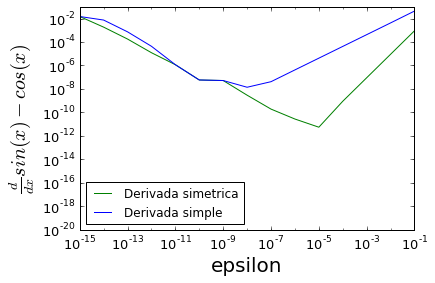

In [25]:
dsindx_mejorado = (np.sin(1.0 + epsilon) - np.sin(1.0 - epsilon)) / (2 * epsilon)

plt.plot(epsilon, np.fabs(dsindx_mejorado - np.cos(1.)), color='g', label="Derivada simetrica")
plt.plot(epsilon, np.fabs(dsindx - np.cos(1.)), color='b', label="Derivada simple")
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-20, 1e-1)
plt.axhline(0)
plt.xlabel('epsilon', fontsize=20)
plt.ylabel('$\\frac{d}{dx}sin(x) - cos(x)$', fontsize=20)
plt.legend(loc='lower left')
_ = plt.xticks(epsilon[::2])

### ¿Qué pasaría si usáramos números de mayor precisión?